1. Import required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import neighbors
from sklearn import ensemble

2. Data importing

In [2]:
#Import original ETF dataset and find out the columns' name
etf = pd.read_csv("raw_data/ETFs.csv")
for col in etf.columns:
    print(col)

fund_symbol
quote_type
region
fund_short_name
fund_long_name
currency
fund_category
fund_family
exchange_code
exchange_name
exchange_timezone
avg_vol_3month
avg_vol_10day
total_net_assets
day50_moving_average
day200_moving_average
week52_high_low_change
week52_high_low_change_perc
week52_high
week52_high_change
week52_high_change_perc
week52_low
week52_low_change
week52_low_change_perc
investment_strategy
fund_yield
inception_date
annual_holdings_turnover
investment_type
size_type
fund_annual_report_net_expense_ratio
category_annual_report_net_expense_ratio
asset_stocks
asset_bonds
fund_sector_basic_materials
fund_sector_communication_services
fund_sector_consumer_cyclical
fund_sector_consumer_defensive
fund_sector_energy
fund_sector_financial_services
fund_sector_healthcare
fund_sector_industrials
fund_sector_real_estate
fund_sector_technology
fund_sector_utilities
fund_price_book_ratio
fund_price_cashflow_ratio
fund_price_earning_ratio
fund_price_sales_ratio
fund_bond_maturity
fund_b

In [3]:
#Extracting required features from the dataset
etf_sub=etf.loc[:,['fund_symbol','investment_type','total_net_assets','size_type','asset_stocks','asset_bonds','fund_price_book_ratio','fund_price_cashflow_ratio','fund_price_earning_ratio'
,'fund_price_sales_ratio','fund_sector_basic_materials','fund_sector_communication_services','fund_sector_consumer_cyclical','fund_sector_consumer_defensive','fund_sector_energy',
'fund_sector_financial_services','fund_sector_healthcare','fund_sector_industrials','fund_sector_real_estate','fund_return_1month',
'fund_sector_technology','fund_sector_utilities']]
etf_sub

,fund_symbol,investment_type,total_net_assets,size_type,asset_stocks,asset_bonds,fund_price_book_ratio,fund_price_cashflow_ratio,fund_price_earning_ratio,fund_price_sales_ratio,...,fund_sector_consumer_cyclical,fund_sector_consumer_defensive,fund_sector_energy,fund_sector_financial_services,fund_sector_healthcare,fund_sector_industrials,fund_sector_real_estate,fund_return_1month,fund_sector_technology,fund_sector_utilities
0,AAAU,NaN,3.844486e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AADR,Blend,8.883616e+07,Large,NaN,NaN,1.71,7.46,13.34,1.20,...,0.1164,0.0000,0.0455,0.1125,0.0799,0.1394,0.0000,0.0049,0.1791,0.0000
2,AAXJ,Blend,5.574672e+09,Large,NaN,NaN,2.03,11.70,18.00,1.42,...,0.1683,0.0474,0.0266,0.1824,0.0524,0.0579,0.0391,-0.0709,0.2444,0.0239
3,ABEQ,Value,4.969417e+07,Large,NaN,NaN,1.79,12.48,16.71,1.91,...,0.0420,0.1042,0.0606,0.2352,0.1335,0.0147,0.0625,-0.0383,0.0597,0.0422
4,ACES,Growth,1.007483e+09,Medium,0.9992,0.0,3.62,15.08,31.27,4.09,...,0.1412,0.0000,0.0301,0.0000,0.0000,0.1956,0.0353,0.0988,0.3491,0.2390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,EPP,Blend,2.446532e+09,Large,0.9970,0.0,1.92,12.13,22.83,3.27,...,0.0532,0.0450,0.0217,0.3905,0.0749,0.0855,0.1097,-0.0126,0.0217,0.0370
2306,ERUS,Value,5.766318e+08,Large,NaN,NaN,1.18,5.59,10.87,1.35,...,0.0106,0.0491,0.4148,0.2115,0.0000,0.0000,0.0000,0.0377,0.0145,0.0153
2307,EWA,Blend,1.527077e+09,Large,0.9976,0.0,2.45,12.28,23.59,3.26,...,0.0553,0.0548,0.0355,0.3411,0.1084,0.0578,0.0656,-0.0081,0.0320,0.0118
2308,EWC,Blend,4.342182e+09,Large,0.9962,0.0,2.22,11.97,17.73,2.19,...,0.0357,0.0451,0.1396,0.3660,0.0074,0.0993,0.0070,-0.0098,0.1285,0.0384


In [4]:
#Remove rows that contain missing value(s)
etf_sub.dropna(axis=0,inplace=True)
etf_sub

,fund_symbol,investment_type,total_net_assets,size_type,asset_stocks,asset_bonds,fund_price_book_ratio,fund_price_cashflow_ratio,fund_price_earning_ratio,fund_price_sales_ratio,...,fund_sector_consumer_cyclical,fund_sector_consumer_defensive,fund_sector_energy,fund_sector_financial_services,fund_sector_healthcare,fund_sector_industrials,fund_sector_real_estate,fund_return_1month,fund_sector_technology,fund_sector_utilities
4,ACES,Growth,1.007483e+09,Medium,0.9992,0.0,3.62,15.08,31.27,4.09,...,0.1412,0.0000,0.0301,0.0000,0.0000,0.1956,0.0353,0.0988,0.3491,0.2390
5,ACIO,Blend,2.321077e+08,Large,1.0000,0.0,5.41,18.73,27.27,3.23,...,0.0895,0.0783,0.0334,0.1489,0.1366,0.1059,0.0259,0.0130,0.2210,0.0256
6,ACSI,Blend,8.072053e+07,Large,0.9995,0.0,3.95,16.70,23.53,1.88,...,0.2836,0.1045,0.0000,0.1188,0.0801,0.0763,0.0000,0.0064,0.1401,0.0410
7,ACTV,Value,7.133470e+07,Small,0.9908,0.0,2.27,9.53,15.47,1.11,...,0.0857,0.0757,0.0820,0.1641,0.2019,0.1110,0.0271,0.0082,0.2242,0.0000
8,ACWI,Blend,1.685481e+10,Large,0.9954,0.0,2.90,14.20,22.87,2.16,...,0.1201,0.0715,0.0348,0.1558,0.1174,0.0965,0.0275,0.0126,0.2041,0.0261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,EEM,Blend,3.098807e+10,Large,0.9929,0.0,1.97,9.81,14.78,1.56,...,0.1492,0.0560,0.0533,0.1900,0.0505,0.0476,0.0200,0.0157,0.2148,0.0211
2304,EIRL,Blend,6.559766e+07,Medium,0.9982,0.0,1.68,12.74,33.91,1.56,...,0.2727,0.1790,0.0000,0.0716,0.0627,0.1618,0.0420,-0.0382,0.0000,0.0000
2305,EPP,Blend,2.446532e+09,Large,0.9970,0.0,1.92,12.13,22.83,3.27,...,0.0532,0.0450,0.0217,0.3905,0.0749,0.0855,0.1097,-0.0126,0.0217,0.0370
2307,EWA,Blend,1.527077e+09,Large,0.9976,0.0,2.45,12.28,23.59,3.26,...,0.0553,0.0548,0.0355,0.3411,0.1084,0.0578,0.0656,-0.0081,0.0320,0.0118


I create the target column called "label" with the following rules:
- If fund_return_1month > mean(fund_return_1month) + 1 std(fund_return_1month) => value = 1 (winning fund)
- If fund_return_1month > mean(fund_return_1month) + 1 std(fund_return_1month) => value = -1 (losing fund)
- Else: value = 0

In [5]:
#Define a function to create new column "label"
def f(row):
    if row['fund_return_1month'] > etf_sub['fund_return_1month'].mean() + etf_sub['fund_return_1month'].std():
        val = 1
    elif row['fund_return_1month'] < etf_sub['fund_return_1month'].mean() - etf_sub['fund_return_1month'].std():
        val = -1
    else:
        val = 0
    return val

etf_sub['label'] = etf_sub.apply(f, axis=1)

etf_sub.head()

,fund_symbol,investment_type,total_net_assets,size_type,asset_stocks,asset_bonds,fund_price_book_ratio,fund_price_cashflow_ratio,fund_price_earning_ratio,fund_price_sales_ratio,...,fund_sector_consumer_defensive,fund_sector_energy,fund_sector_financial_services,fund_sector_healthcare,fund_sector_industrials,fund_sector_real_estate,fund_return_1month,fund_sector_technology,fund_sector_utilities,label
4,ACES,Growth,1.007483e+09,Medium,0.9992,0.0,3.62,15.08,31.27,4.09,...,0.0000,0.0301,0.0000,0.0000,0.1956,0.0353,0.0988,0.3491,0.2390,1
5,ACIO,Blend,2.321077e+08,Large,1.0000,0.0,5.41,18.73,27.27,3.23,...,0.0783,0.0334,0.1489,0.1366,0.1059,0.0259,0.0130,0.2210,0.0256,0
6,ACSI,Blend,8.072053e+07,Large,0.9995,0.0,3.95,16.70,23.53,1.88,...,0.1045,0.0000,0.1188,0.0801,0.0763,0.0000,0.0064,0.1401,0.0410,0
7,ACTV,Value,7.133470e+07,Small,0.9908,0.0,2.27,9.53,15.47,1.11,...,0.0757,0.0820,0.1641,0.2019,0.1110,0.0271,0.0082,0.2242,0.0000,0
8,ACWI,Blend,1.685481e+10,Large,0.9954,0.0,2.90,14.20,22.87,2.16,...,0.0715,0.0348,0.1558,0.1174,0.0965,0.0275,0.0126,0.2041,0.0261,0


In [6]:
#Create dummy variables for categorical variables
etf_sub_encoded=pd.get_dummies(etf_sub.loc[:,["investment_type",'size_type']])
etf_sub_encoded.head()

,investment_type_Blend,investment_type_Growth,investment_type_Value,size_type_Large,size_type_Medium,size_type_Small
4,0,1,0,0,1,0
5,1,0,0,1,0,0
6,1,0,0,1,0,0
7,0,0,1,0,0,1
8,1,0,0,1,0,0


In [7]:
#Combine the dummy variables with the original dataset
etf_sub=etf_sub.join(etf_sub_encoded, how="outer")
etf_sub

,fund_symbol,investment_type,total_net_assets,size_type,asset_stocks,asset_bonds,fund_price_book_ratio,fund_price_cashflow_ratio,fund_price_earning_ratio,fund_price_sales_ratio,...,fund_return_1month,fund_sector_technology,fund_sector_utilities,label,investment_type_Blend,investment_type_Growth,investment_type_Value,size_type_Large,size_type_Medium,size_type_Small
4,ACES,Growth,1.007483e+09,Medium,0.9992,0.0,3.62,15.08,31.27,4.09,...,0.0988,0.3491,0.2390,1,0,1,0,0,1,0
5,ACIO,Blend,2.321077e+08,Large,1.0000,0.0,5.41,18.73,27.27,3.23,...,0.0130,0.2210,0.0256,0,1,0,0,1,0,0
6,ACSI,Blend,8.072053e+07,Large,0.9995,0.0,3.95,16.70,23.53,1.88,...,0.0064,0.1401,0.0410,0,1,0,0,1,0,0
7,ACTV,Value,7.133470e+07,Small,0.9908,0.0,2.27,9.53,15.47,1.11,...,0.0082,0.2242,0.0000,0,0,0,1,0,0,1
8,ACWI,Blend,1.685481e+10,Large,0.9954,0.0,2.90,14.20,22.87,2.16,...,0.0126,0.2041,0.0261,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,EEM,Blend,3.098807e+10,Large,0.9929,0.0,1.97,9.81,14.78,1.56,...,0.0157,0.2148,0.0211,0,1,0,0,1,0,0
2304,EIRL,Blend,6.559766e+07,Medium,0.9982,0.0,1.68,12.74,33.91,1.56,...,-0.0382,0.0000,0.0000,-1,1,0,0,0,1,0
2305,EPP,Blend,2.446532e+09,Large,0.9970,0.0,1.92,12.13,22.83,3.27,...,-0.0126,0.0217,0.0370,0,1,0,0,1,0,0
2307,EWA,Blend,1.527077e+09,Large,0.9976,0.0,2.45,12.28,23.59,3.26,...,-0.0081,0.0320,0.0118,0,1,0,0,1,0,0


In [8]:
#Rearrange the order of the variables
etf_sub=etf_sub.loc[:,['investment_type_Blend','investment_type_Growth','investment_type_Value','total_net_assets','size_type_Large','size_type_Medium','size_type_Small','asset_stocks','asset_bonds','fund_price_book_ratio','fund_price_cashflow_ratio','fund_price_earning_ratio'
,'fund_price_sales_ratio','fund_sector_basic_materials','fund_sector_communication_services','fund_sector_consumer_cyclical','fund_sector_consumer_defensive','fund_sector_energy',
'fund_sector_financial_services','fund_sector_healthcare','fund_sector_industrials','fund_sector_real_estate',
'fund_sector_technology','fund_sector_utilities','label']]
etf_sub

,investment_type_Blend,investment_type_Growth,investment_type_Value,total_net_assets,size_type_Large,size_type_Medium,size_type_Small,asset_stocks,asset_bonds,fund_price_book_ratio,...,fund_sector_consumer_cyclical,fund_sector_consumer_defensive,fund_sector_energy,fund_sector_financial_services,fund_sector_healthcare,fund_sector_industrials,fund_sector_real_estate,fund_sector_technology,fund_sector_utilities,label
4,0,1,0,1.007483e+09,0,1,0,0.9992,0.0,3.62,...,0.1412,0.0000,0.0301,0.0000,0.0000,0.1956,0.0353,0.3491,0.2390,1
5,1,0,0,2.321077e+08,1,0,0,1.0000,0.0,5.41,...,0.0895,0.0783,0.0334,0.1489,0.1366,0.1059,0.0259,0.2210,0.0256,0
6,1,0,0,8.072053e+07,1,0,0,0.9995,0.0,3.95,...,0.2836,0.1045,0.0000,0.1188,0.0801,0.0763,0.0000,0.1401,0.0410,0
7,0,0,1,7.133470e+07,0,0,1,0.9908,0.0,2.27,...,0.0857,0.0757,0.0820,0.1641,0.2019,0.1110,0.0271,0.2242,0.0000,0
8,1,0,0,1.685481e+10,1,0,0,0.9954,0.0,2.90,...,0.1201,0.0715,0.0348,0.1558,0.1174,0.0965,0.0275,0.2041,0.0261,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,1,0,0,3.098807e+10,1,0,0,0.9929,0.0,1.97,...,0.1492,0.0560,0.0533,0.1900,0.0505,0.0476,0.0200,0.2148,0.0211,0
2304,1,0,0,6.559766e+07,0,1,0,0.9982,0.0,1.68,...,0.2727,0.1790,0.0000,0.0716,0.0627,0.1618,0.0420,0.0000,0.0000,-1
2305,1,0,0,2.446532e+09,1,0,0,0.9970,0.0,1.92,...,0.0532,0.0450,0.0217,0.3905,0.0749,0.0855,0.1097,0.0217,0.0370,0
2307,1,0,0,1.527077e+09,1,0,0,0.9976,0.0,2.45,...,0.0553,0.0548,0.0355,0.3411,0.1084,0.0578,0.0656,0.0320,0.0118,0


3. Exploratory Data Analysis

<AxesSubplot:>

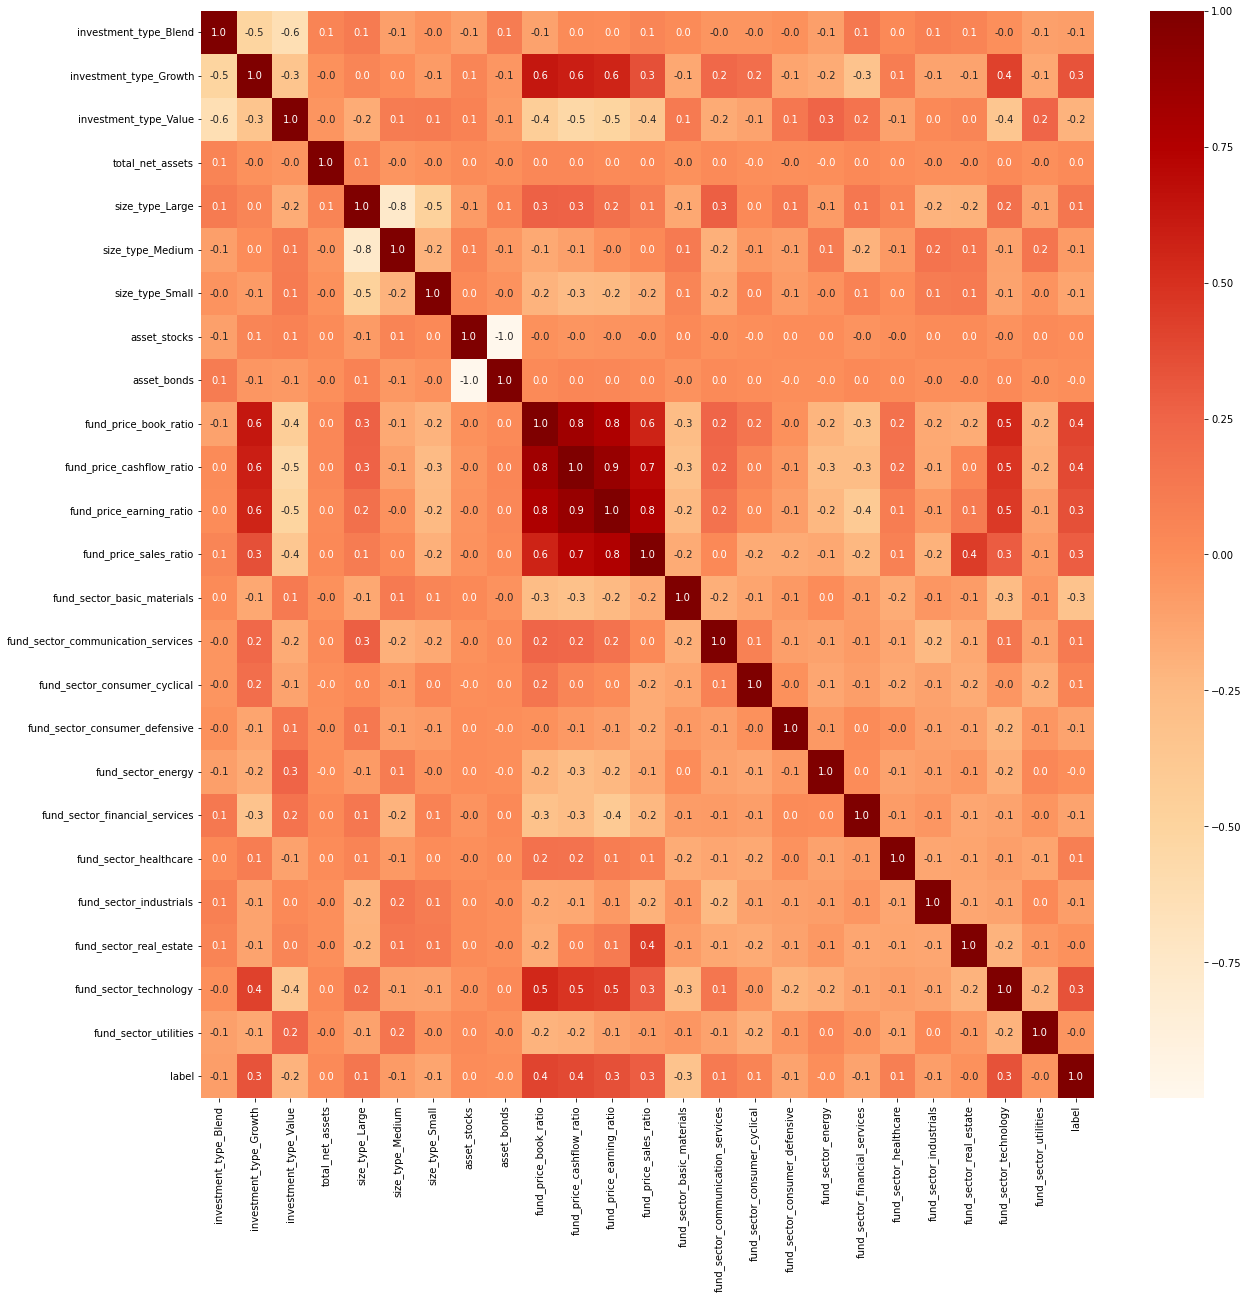

In [9]:
#Create correlation matrix between features and target
plt.figure(figsize=(20,20))
sns.heatmap(data=etf_sub.corr(numeric_only=True), cbar=True, fmt='.1f', annot=True, cmap='OrRd')

- From the heatmap, we can see that there are significant positive correlation between the ratio of price per share to earnings per share, the ratio of price per share to book value per share, the ratio of price per share to sales per share and the ratio of price per share to cash flow per share.
- Among the features, the ratio of price per share to book value per share and the ratio of price per share to cash flow per share has the highest degree of correlation to the target variable.

<AxesSubplot:xlabel='label', ylabel='total_net_assets'>

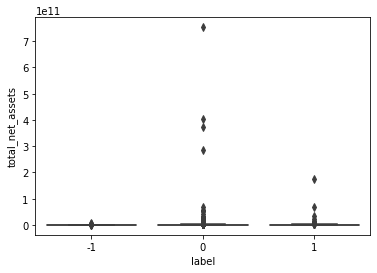

In [10]:
#Boxplot of total net assets divided by labels
sns.boxplot(data=etf_sub,y='total_net_assets',x='label')

<AxesSubplot:xlabel='label', ylabel='asset_stocks'>

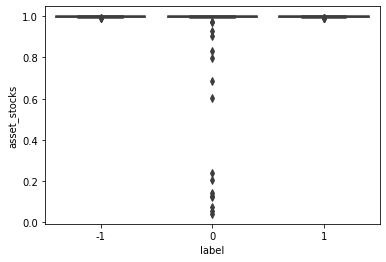

In [11]:
#Boxplot of the ratio of stocks to total assets in the fund divided by labels
sns.boxplot(data=etf_sub,y='asset_stocks',x='label')

<AxesSubplot:xlabel='label', ylabel='asset_bonds'>

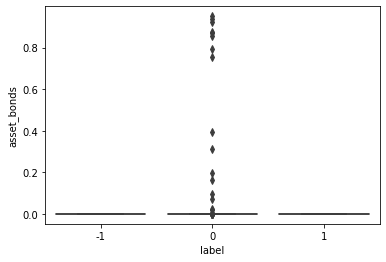

In [12]:
#Boxplot of the ratio of bonds to total assets in the fund divided by labels
sns.boxplot(data=etf_sub,y='asset_bonds',x='label')

<AxesSubplot:xlabel='label', ylabel='fund_price_book_ratio'>

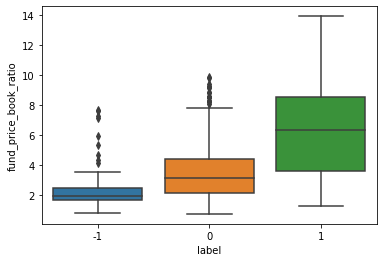

In [13]:
#Boxplot of the ratio of price per share to book value per share divided by labels
sns.boxplot(data=etf_sub,y='fund_price_book_ratio',x='label')

From the plot, we can see that winning funds have higher ratio of price per share to book value per share

<AxesSubplot:xlabel='label', ylabel='fund_price_cashflow_ratio'>

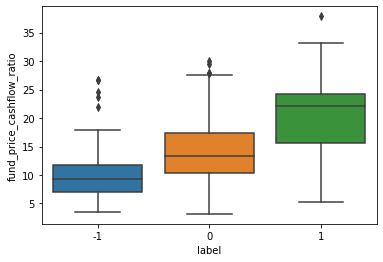

In [14]:
#Boxplot of the ratio of price per share to cash flow per share divided by labels
sns.boxplot(data=etf_sub,y='fund_price_cashflow_ratio',x='label')

From the plot, we can see that winning funds have higher ratio of price per share to cash flow per share

<AxesSubplot:xlabel='label', ylabel='fund_price_earning_ratio'>

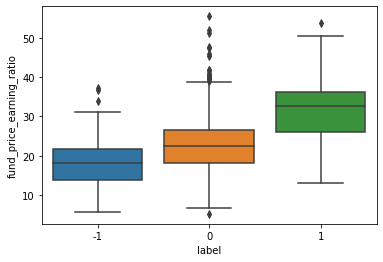

In [15]:
#Boxplot of the ratio of price per share to earnings per share divided by labels
sns.boxplot(data=etf_sub,y='fund_price_earning_ratio',x='label')

From the plot, we can see that winning funds have higher ratio of price per share to earnings per share

<AxesSubplot:xlabel='label', ylabel='fund_price_sales_ratio'>

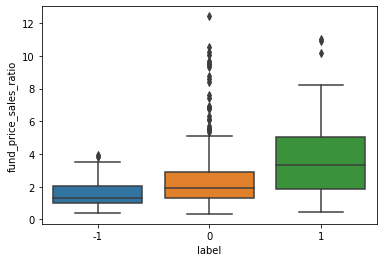

In [16]:
#Boxplot of the ratio of price per share to sales per share divided by labels
sns.boxplot(data=etf_sub,y='fund_price_sales_ratio',x='label')

From the plot, we can see that winning funds have higher ratio of price per share to sales per share

<AxesSubplot:xlabel='label', ylabel='fund_sector_basic_materials'>

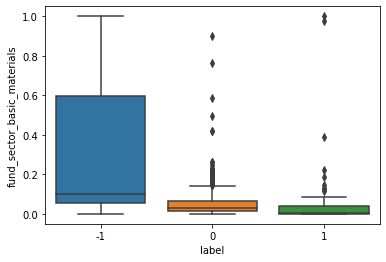

In [17]:
#Boxplot of the sector weight of basic materials divided by labels
sns.boxplot(data=etf_sub,y='fund_sector_basic_materials',x='label')

From the plot, we can see that losing funds have higher weights in basic materials

<AxesSubplot:xlabel='label', ylabel='fund_sector_communication_services'>

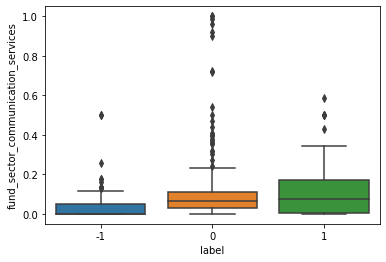

In [18]:
#Boxplot of the sector weight of communication services divided by labels
sns.boxplot(data=etf_sub,y='fund_sector_communication_services',x='label')

<AxesSubplot:xlabel='label', ylabel='fund_sector_consumer_cyclical'>

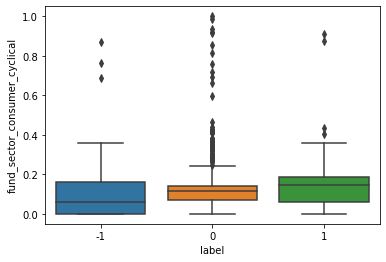

In [19]:
#Boxplot of the sector weight of consumer cyclical divided by labels
sns.boxplot(data=etf_sub,y='fund_sector_consumer_cyclical',x='label')

<AxesSubplot:xlabel='label', ylabel='fund_sector_consumer_defensive'>

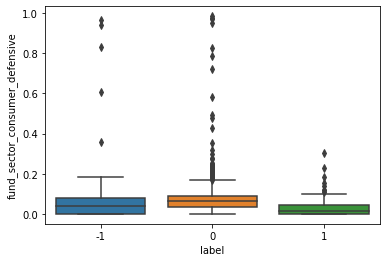

In [20]:
#Boxplot of the sector weight of consumer defensive divided by labels
sns.boxplot(data=etf_sub,y='fund_sector_consumer_defensive',x='label')

<AxesSubplot:xlabel='label', ylabel='fund_sector_energy'>

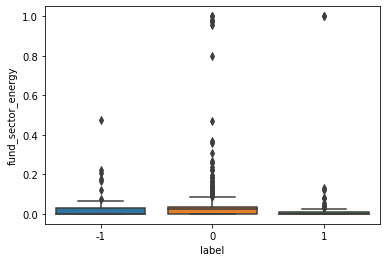

In [21]:
#Boxplot of the sector weight of energy divided by labels
sns.boxplot(data=etf_sub,y='fund_sector_energy',x='label')

<AxesSubplot:xlabel='label', ylabel='fund_sector_financial_services'>

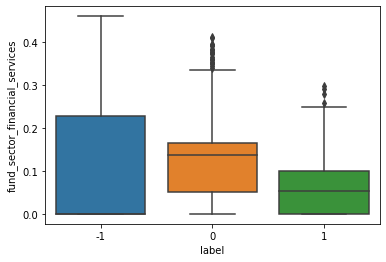

In [22]:
#Boxplot of the sector weight of financial services divided by labels
sns.boxplot(data=etf_sub,y='fund_sector_financial_services',x='label')

<AxesSubplot:xlabel='label', ylabel='fund_sector_healthcare'>

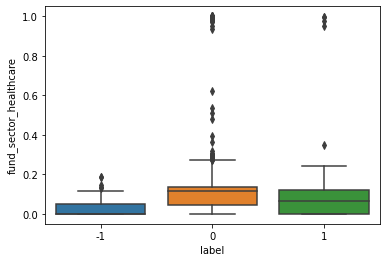

In [23]:
#Boxplot of the sector weight of healthcare divided by labels
sns.boxplot(data=etf_sub,y='fund_sector_healthcare',x='label')

<AxesSubplot:xlabel='label', ylabel='fund_sector_industrials'>

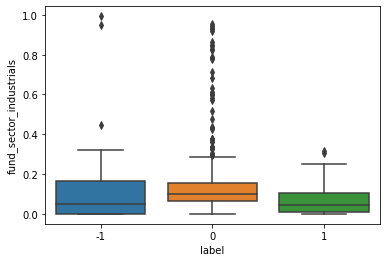

In [24]:
#Boxplot of the sector weight of industrials divided by labels
sns.boxplot(data=etf_sub,y='fund_sector_industrials',x='label')

<AxesSubplot:xlabel='label', ylabel='fund_sector_real_estate'>

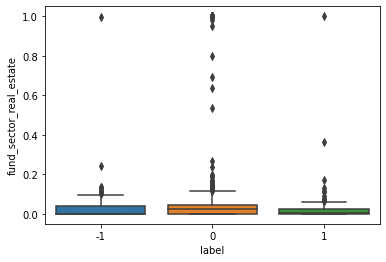

In [25]:
#Boxplot of the sector weight of real estate divided by labels
sns.boxplot(data=etf_sub,y='fund_sector_real_estate',x='label')

<AxesSubplot:xlabel='label', ylabel='fund_sector_technology'>

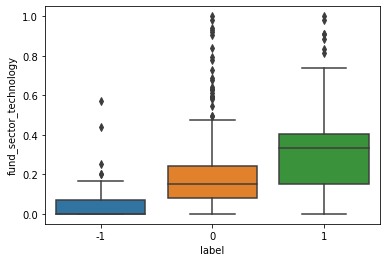

In [26]:
#Boxplot of the sector weight of technology divided by labels
sns.boxplot(data=etf_sub,y='fund_sector_technology',x='label')

From the graph, we can see that the winning funds invest more in technology sector

<AxesSubplot:xlabel='label', ylabel='fund_sector_utilities'>

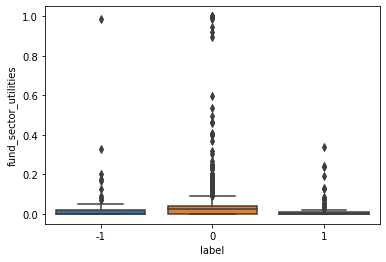

In [27]:
#Boxplot of the sector weight of utilities divided by labels
sns.boxplot(data=etf_sub,y='fund_sector_utilities',x='label')

5. Prepare training and testing datasets

In [28]:
#Extracting the target variables
y = etf_sub['label']
y

4       1
5       0
6       0
7       0
8       0
       ..
2303    0
2304   -1
2305    0
2307    0
2308    0
Name: label, Length: 1065, dtype: int64

In [29]:
#Extracting the features
X = etf_sub.drop(labels='label',axis=1)
X

,investment_type_Blend,investment_type_Growth,investment_type_Value,total_net_assets,size_type_Large,size_type_Medium,size_type_Small,asset_stocks,asset_bonds,fund_price_book_ratio,...,fund_sector_communication_services,fund_sector_consumer_cyclical,fund_sector_consumer_defensive,fund_sector_energy,fund_sector_financial_services,fund_sector_healthcare,fund_sector_industrials,fund_sector_real_estate,fund_sector_technology,fund_sector_utilities
4,0,1,0,1.007483e+09,0,1,0,0.9992,0.0,3.62,...,0.0000,0.1412,0.0000,0.0301,0.0000,0.0000,0.1956,0.0353,0.3491,0.2390
5,1,0,0,2.321077e+08,1,0,0,1.0000,0.0,5.41,...,0.1050,0.0895,0.0783,0.0334,0.1489,0.1366,0.1059,0.0259,0.2210,0.0256
6,1,0,0,8.072053e+07,1,0,0,0.9995,0.0,3.95,...,0.1555,0.2836,0.1045,0.0000,0.1188,0.0801,0.0763,0.0000,0.1401,0.0410
7,0,0,1,7.133470e+07,0,0,1,0.9908,0.0,2.27,...,0.0000,0.0857,0.0757,0.0820,0.1641,0.2019,0.1110,0.0271,0.2242,0.0000
8,1,0,0,1.685481e+10,1,0,0,0.9954,0.0,2.90,...,0.0987,0.1201,0.0715,0.0348,0.1558,0.1174,0.0965,0.0275,0.2041,0.0261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,1,0,0,3.098807e+10,1,0,0,0.9929,0.0,1.97,...,0.1097,0.1492,0.0560,0.0533,0.1900,0.0505,0.0476,0.0200,0.2148,0.0211
2304,1,0,0,6.559766e+07,0,1,0,0.9982,0.0,1.68,...,0.0000,0.2727,0.1790,0.0000,0.0716,0.0627,0.1618,0.0420,0.0000,0.0000
2305,1,0,0,2.446532e+09,1,0,0,0.9970,0.0,1.92,...,0.0330,0.0532,0.0450,0.0217,0.3905,0.0749,0.0855,0.1097,0.0217,0.0370
2307,1,0,0,1.527077e+09,1,0,0,0.9976,0.0,2.45,...,0.0294,0.0553,0.0548,0.0355,0.3411,0.1084,0.0578,0.0656,0.0320,0.0118


In [30]:
#Create the training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [31]:
#Imbalance in training dataset
y_train.value_counts()

 0    719
 1     81
-1     52
Name: label, dtype: int64

6. Classification And Regression Tree

In [32]:
#Grid search to optimize the hyperparameters
dec_tree = tree.DecisionTreeClassifier()
parameters = {'criterion':['gini', 'entropy','log_loss'], 'splitter':['best','random'],'max_depth':[1,2,3,4,5]}
clf_GS = GridSearchCV(dec_tree, parameters,scoring='f1_weighted')
clf_GS.fit(X_train, y_train)
clf_GS.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [33]:
#Fitting the model with optimal hyperparameters
dec_tree = tree.DecisionTreeClassifier(max_depth=2)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

Because the target variable is unbalanced, it is suitable to use f1 score to test the out-of-sample accuracy

In [34]:
#Checking the out of sample accuracy
y_pred=dec_tree.predict(X=X_test)
f1_score(y_test,y_pred,average='weighted')

0.8400470595873212

7. SVM

In [35]:
#Grid search to optimize the hyperparameters
svm = svm.SVC()
parameters={'C':[1, 10, 100],'gamma':['scale','auto']}
svm_GS = GridSearchCV(svm, parameters,scoring='f1_weighted')
svm_GS.fit(X_train, y_train)
svm_GS.best_estimator_.get_params()

{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [37]:
#Fitting the model with optimal hyperparameters
svm = svm.SVC(C=1, gamma='scale')
svm.fit(X_train, y_train)

SVC(C=1)

In [38]:
#Checking the out of sample accuracy
y_pred=svm.predict(X=X_test)
f1_score(y_test,y_pred,average='weighted')

0.7807487905436

8. KNN

In [39]:
#Grid search to optimize the hyperparameters
knn = neighbors.KNeighborsClassifier()
parameters={'n_neighbors':[1,2,3,4,5],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree','brute']}
knn_GS = GridSearchCV(knn, parameters,scoring='f1_weighted')
knn_GS.fit(X_train, y_train)
knn_GS.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [40]:
#Fitting the model with optimal hyperparameters
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
#Checking the out of sample accuracy
y_pred=knn.predict(X=X_test)
f1_score(y_test,y_pred,average='weighted')

0.7617066822350337

9. Random Forest

In [45]:
#Grid search to optimize the hyperparameters
forest = ensemble.RandomForestClassifier()
parameters={'max_depth':[10, 20 ,30],'max_features':['sqrt','log2',None],'class_weight':['balanced','balanced_subsample'],
'criterion':['gini','entropy','log_loss']}
forest_GS = GridSearchCV(forest, parameters,scoring='f1_weighted')
forest_GS.fit(X_train, y_train)
forest_GS.best_estimator_.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [46]:
#Fitting the model with optimal hyperparameters
forest = ensemble.RandomForestClassifier(max_depth=10,max_features=None,class_weight='balanced_subsample',criterion='gini')
forest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=10,
                       max_features=None)

In [47]:
#Checking the out of sample accuracy
y_pred=forest.predict(X=X_test)
f1_score(y_test,y_pred,average='weighted')

0.8562289004837056

In conclusion, we can see that random forest is the optimum method to classify winning and losing funds with the highest out of sample accuracy of 85.6%